In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving updated_fake.csv to updated_fake (1).csv


In [5]:
import pandas as pd
data = pd.read_csv('/content/updated_fake (1).csv')
data

,date,content,subject,Fake
0,31-Dec-17,Donald Trump Sends Out Embarrassing New Year’...,Social Issues,1
1,31-Dec-17,Drunk Bragging Trump Staffer Started Russian ...,Social Issues,1
2,30-Dec-17,Sheriff David Clarke Becomes An Internet Joke...,Other,1
3,29-Dec-17,Trump Is So Obsessed He Even Has Obama’s Name...,Social Issues,1
4,25-Dec-17,Pope Francis Just Called Out Donald Trump Dur...,Other,1
...,...,...,...,...
44862,28-Aug-17,German admits selling gun to Munich attack sho...,Other,0
44863,28-Aug-17,German killer nurse suspected of 84 more murde...,Other,0
44864,28-Aug-17,Poland tells EU its overhaul of judiciary in l...,Entertainment,0
44865,28-Aug-17,Kabul mosque attack: four-year-old called to s...,Other,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44867 entries, 0 to 44866
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     44867 non-null  object
 1   content  44867 non-null  object
 2   subject  44867 non-null  object
 3   Fake     44867 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [7]:
data.columns

Index(['date', 'content', 'subject', 'Fake'], dtype='object')

In [8]:
data["subject"].value_counts()

,count
subject,
Other,17853
Social Issues,10355
Entertainment,9423
International Affairs,4022
Politics,3214


In [9]:
data["subject"][data["Fake"] == 1].value_counts()

,count
subject,
Other,12356
Social Issues,7416
Politics,2414
International Affairs,698
Entertainment,566


In [10]:
data.isnull().sum()

,0
date,0
content,0
subject,0
Fake,0


## **TF-IDF**

In [11]:
import nltk
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import euclidean, cityblock, cosine
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
from nltk.stem import PorterStemmer
import string
from nltk.tokenize import word_tokenize


stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

custom_stop_words = {"could", "news", "year", "message", "like", "also", "said", "told", "would", "new", "get", "one", "even"}
stop_words.update(custom_stop_words)

def clean_and_stem(text):
    tokens = word_tokenize(text)

    filtered_tokens = [
        word.lower() for word in tokens
        if word.lower() not in stop_words and word not in string.punctuation
    ]

    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens


data['content_cleaned_stemmed'] = data['content'].apply(clean_and_stem)

print(data[['content', 'content_cleaned_stemmed']].head())


                                             content  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                             content_cleaned_stemmed  
0  [donald, trump, send, embarrass, ’, eve, distu...  
1  [drunk, brag, trump, staffer, start, russian, ...  
2  [sheriff, david, clark, becom, internet, joke,...  
3  [trump, obsess, obama, ’, name, code, websit, ...  
4  [pope, franci, call, donald, trump, christma, ...  


In [13]:
data.drop(columns=['content'], inplace=True)
data.head()

,date,subject,Fake,content_cleaned_stemmed
0,31-Dec-17,Social Issues,1,"[donald, trump, send, embarrass, ’, eve, distu..."
1,31-Dec-17,Social Issues,1,"[drunk, brag, trump, staffer, start, russian, ..."
2,30-Dec-17,Other,1,"[sheriff, david, clark, becom, internet, joke,..."
3,29-Dec-17,Social Issues,1,"[trump, obsess, obama, ’, name, code, websit, ..."
4,25-Dec-17,Other,1,"[pope, franci, call, donald, trump, christma, ..."


<ipython-input-14-a6609294e645>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news['content_cleaned_stemmed_str'] = fake_news['content_cleaned_stemmed'].apply(lambda x: ' '.join(x))
<ipython-input-14-a6609294e645>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_news['content_cleaned_stemmed_str'] = real_news['content_cleaned_stemmed'].apply(lambda x: ' '.join(x))


Top 10 terms in Fake News:
trump: 1600.2012307010832
presid: 556.0649154792715
clinton: 545.9350005412784
obama: 537.3179168763218
video: 516.7697588352677
hillari: 493.98577489722504
peopl: 462.2751716401536
state: 427.9124042293862
republican: 414.5867817954042
donald: 404.27731792667214


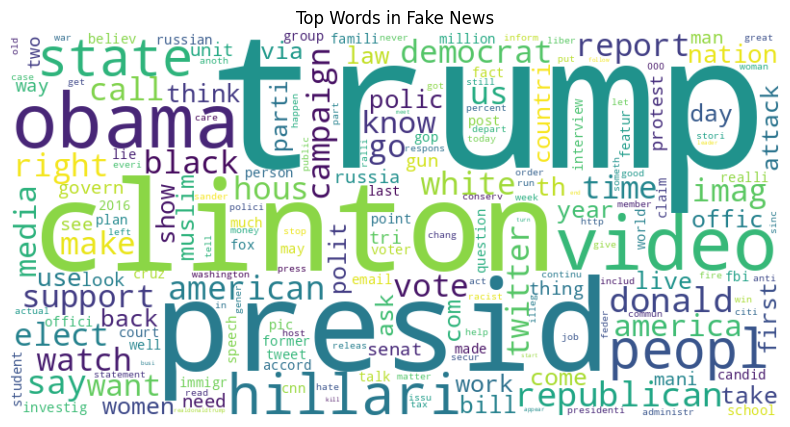

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_news = data[data['Fake'] == 1]
real_news = data[data['Fake'] == 0]

fake_news['content_cleaned_stemmed_str'] = fake_news['content_cleaned_stemmed'].apply(lambda x: ' '.join(x))
real_news['content_cleaned_stemmed_str'] = real_news['content_cleaned_stemmed'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(max_features=10000)

tfidf_fake = vectorizer.fit_transform(fake_news['content_cleaned_stemmed_str'])
feature_names_fake = vectorizer.get_feature_names_out()

tfidf_scores_fake = tfidf_fake.sum(axis=0).A1
fake_term_scores = {feature_names_fake[i]: tfidf_scores_fake[i] for i in range(len(feature_names_fake))}

top_fake_terms = sorted(fake_term_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 terms in Fake News:")
for term, score in top_fake_terms:
    print(f"{term}: {score}")

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_term_scores)

plt.figure(figsize=(10, 5))
plt.title("Top Words in Fake News")
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.show()


trump         1140.516001
state          606.790605
republican     524.286347
presid         502.728419
hous           472.582271
senat          456.017081
elect          401.318103
govern         395.015400
reuter         372.086458
democrat       370.923410
dtype: float64


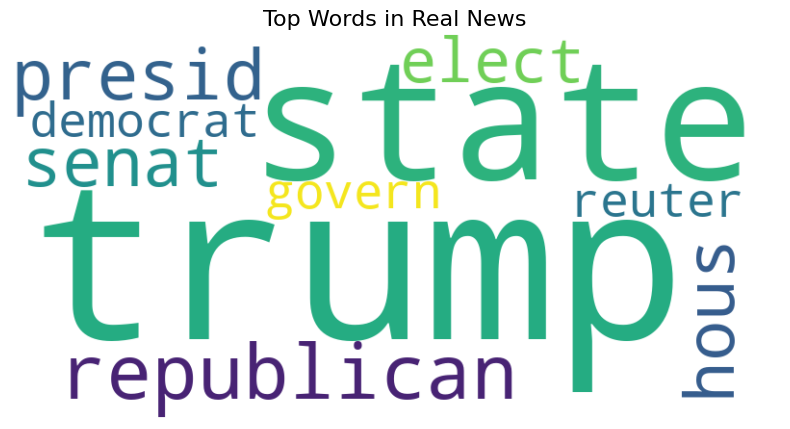

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tfidf_matrix_real = vectorizer.fit_transform(real_news['content_cleaned_stemmed_str'])
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_real = pd.DataFrame(tfidf_matrix_real.toarray(), columns=tfidf_feature_names)
tfidf_real_sums = tfidf_real.sum(axis=0)
top_real_words = tfidf_real_sums.nlargest(10)

print(top_real_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_real_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words in Real News", fontsize=16)
plt.show()


## **OTHER**

<ipython-input-16-7c890098165c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


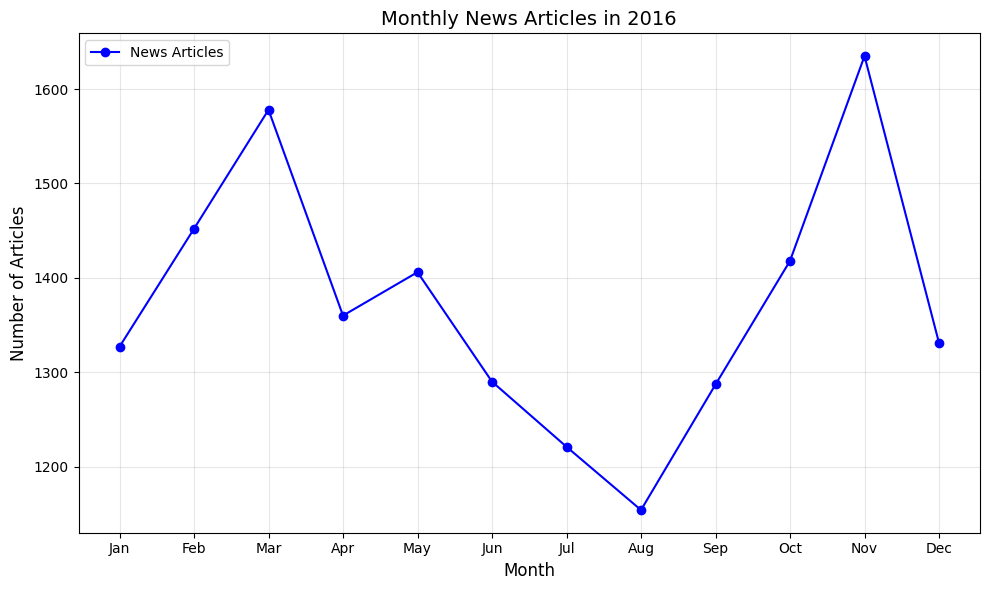

In [16]:
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'])

data_2016 = data[data['date'].dt.year == 2016]

monthly_counts_2016 = data_2016.groupby(data_2016['date'].dt.month).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts_2016.index, monthly_counts_2016.values, marker='o', color='b', label='News Articles')

plt.title("Monthly News Articles in 2016", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()


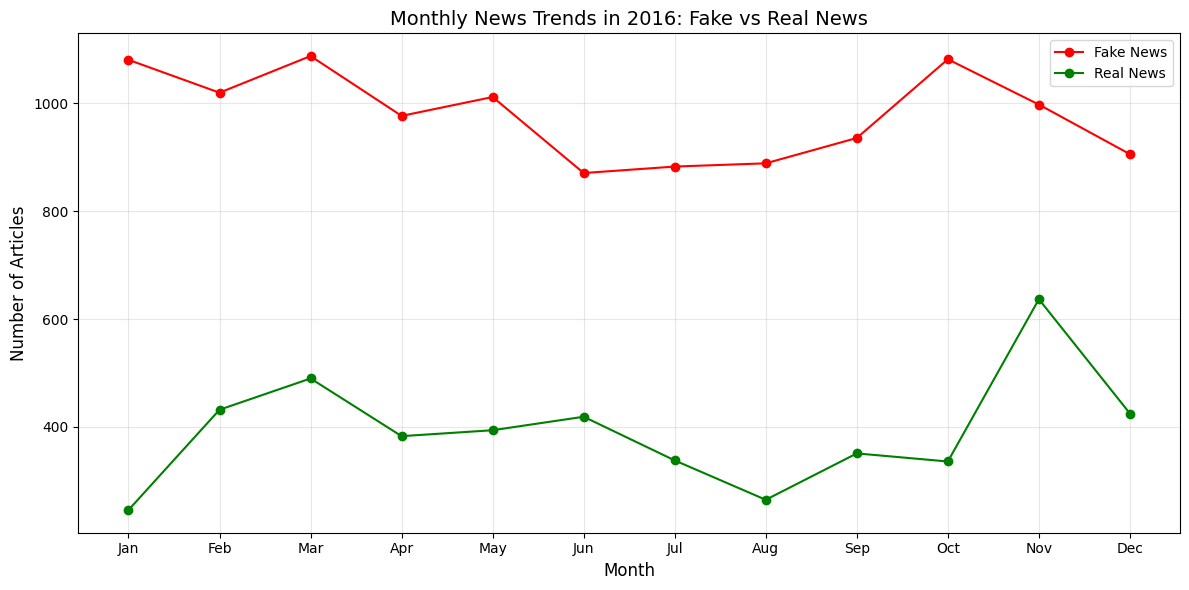

In [17]:
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'])

data_2016 = data[data['date'].dt.year == 2016]

fake_news_2016 = data_2016[data_2016['Fake'] == 1]
real_news_2016 = data_2016[data_2016['Fake'] == 0]

fake_monthly_counts_2016 = fake_news_2016.groupby(fake_news_2016['date'].dt.month).size()
real_monthly_counts_2016 = real_news_2016.groupby(real_news_2016['date'].dt.month).size()

months = range(1, 13)
fake_monthly_counts_2016 = fake_monthly_counts_2016.reindex(months, fill_value=0)
real_monthly_counts_2016 = real_monthly_counts_2016.reindex(months, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(months, fake_monthly_counts_2016, marker='o', color='r', label='Fake News')
plt.plot(months, real_monthly_counts_2016, marker='o', color='g', label='Real News')

plt.title("Monthly News Trends in 2016: Fake vs Real News", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(ticks=months, labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


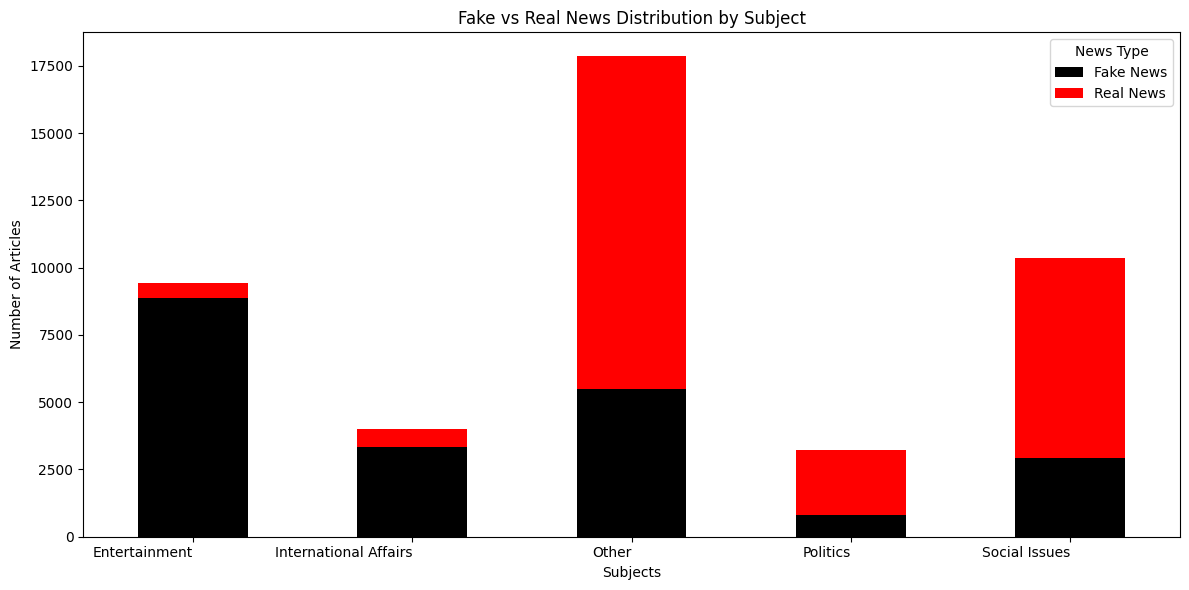

                       Fake News  Real News
subject                                    
Entertainment               8857        566
International Affairs       3324        698
Other                       5497      12356
Politics                     800       2414
Social Issues               2939       7416


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


subject_comparison = data.groupby(['subject', 'Fake']).size().unstack(fill_value=0)

subject_comparison.columns = ['Fake News', 'Real News']

subject_comparison.plot(kind='bar', figsize=(12, 6), stacked=True, color=['black', 'red'])
plt.title("Fake vs Real News Distribution by Subject")
plt.xlabel("Subjects")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0, ha='right')
plt.legend(title="News Type")
plt.tight_layout()
plt.show()

print(subject_comparison)
